# MatplotLib

In [127]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

pd.set_option('display.max_rows',None)


## Reading Data

[Data Download link](https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking)

In [117]:
df = pd.read_csv('spotify.csv')
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')



In [118]:
# Regions
df['Region'].value_counts().head()

fr    74200
mx    74200
se    74200
es    74200
it    74200
Name: Region, dtype: int64

In [119]:
# Songs
df['Track Name'].value_counts().head(10)

Shape of You                                                                                                          19365
Believer                                                                                                              16775
Despacito (Featuring Daddy Yankee)                                                                                    16284
Something Just Like This                                                                                              16194
Rockabye (feat. Sean Paul & Anne-Marie)                                                                               16177
I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)"    15447
Closer                                                                                                                15136
Scared to Be Lonely                                                                                                   14836
It Ain't

## Filtering Data
##### Getting Required Data for makeing different types of PLOT

In [120]:
# Creating Filter
filt = (df['Track Name'].isin(['Shape of You','Believer','Something Just Like This','Let Me Love You'])) &  (df['Region'] == 'global')

In [121]:
# Applying filter
df = df.loc[filt]
df.tail(10)

,Position,Track Name,Artist,Streams,URL,Date,Region
3189710,68,Believer,Imagine Dragons,1005617,https://open.spotify.com/track/0CcQNd8CINkwQfe...,2018-01-06,global
3189855,13,Shape of You,Ed Sheeran,2010547,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2018-01-07,global
3189900,58,Something Just Like This,The Chainsmokers,973303,https://open.spotify.com/track/6RUKPb4LETWmmr3...,2018-01-07,global
3189908,66,Believer,Imagine Dragons,935138,https://open.spotify.com/track/0CcQNd8CINkwQfe...,2018-01-07,global
3190058,16,Shape of You,Ed Sheeran,2073428,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2018-01-08,global
3190106,64,Something Just Like This,The Chainsmokers,1024044,https://open.spotify.com/track/6RUKPb4LETWmmr3...,2018-01-08,global
3190109,67,Believer,Imagine Dragons,997969,https://open.spotify.com/track/0CcQNd8CINkwQfe...,2018-01-08,global
3190260,18,Shape of You,Ed Sheeran,2089950,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2018-01-09,global
3190308,66,Something Just Like This,The Chainsmokers,1041692,https://open.spotify.com/track/6RUKPb4LETWmmr3...,2018-01-09,global
3190310,68,Believer,Imagine Dragons,1010175,https://open.spotify.com/track/0CcQNd8CINkwQfe...,2018-01-09,global


In [122]:
# Pivoting the DF so 
df = df.pivot(index='Date',columns='Track Name',values='Streams')

In [141]:
#Dropping NA, ensuring all three four songs have valid stream values
df.dropna(inplace=True)
df.head()


Track Name,Believer,Let Me Love You,Shape of You,Something Just Like This
Date,,,,
2017-02-24,2203215.0,1726123.0,7758898.0,4752225.0
2017-02-25,2080736.0,1694661.0,7632460.0,4460815.0
2017-02-26,1839730.0,1443675.0,6583478.0,3949869.0
2017-02-27,2024142.0,1490013.0,6873096.0,4374275.0
2017-02-28,2123567.0,1525216.0,7059172.0,4517368.0


# Line Plot

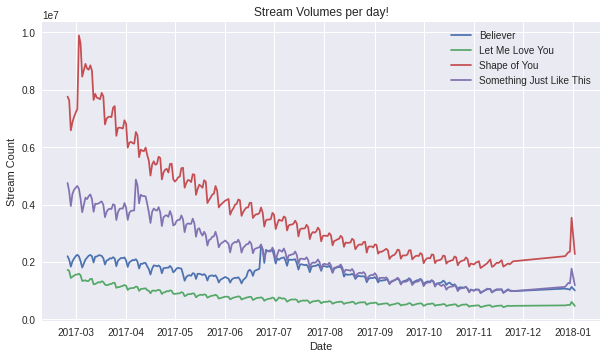

In [139]:
plt.style.use("seaborn")

plt.plot(df.index.values, df['Believer'], label = 'Believer')
plt.plot(df.index.values, df['Let Me Love You'], label = 'Let Me Love You')
plt.plot(df.index.values, df['Shape of You'], label = 'Shape of You')
plt.plot(df.index.values, df['Something Just Like This'], label = 'Something Just Like This')

plt.xlabel('Date')
plt.ylabel('Stream Count')
plt.title('Stream Volumes per day!')

plt.legend()
fig = plt.gcf()
fig.set_size_inches(10, 5.5)
plt.show()


In [163]:
df.head()


Track Name,Believer,Let Me Love You,Shape of You,Something Just Like This
Date,,,,
2017-02-24,2203215.0,1726123.0,7758898.0,4752225.0
2017-02-25,2080736.0,1694661.0,7632460.0,4460815.0
2017-02-26,1839730.0,1443675.0,6583478.0,3949869.0
2017-02-27,2024142.0,1490013.0,6873096.0,4374275.0
2017-02-28,2123567.0,1525216.0,7059172.0,4517368.0


# Bar Plot

In [159]:
total_stream = df.median()
total_stream

Track Name
Believer                    1578752.5
Let Me Love You              673261.5
Shape of You                3301864.0
Something Just Like This    2236577.0
dtype: float64

<BarContainer object of 4 artists>

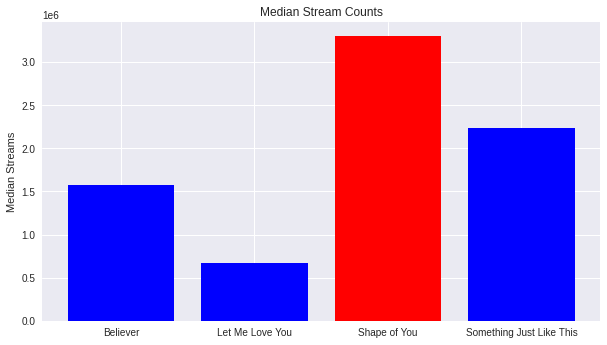

In [179]:
x_tracks = total_stream.index.values
y_streams = total_stream.values
colors = ['b','b','r','b']

plt.title('Median Stream Counts')
plt.ylabel("Median Streams")

fig = plt.gcf() # get current figure
fig.set_size_inches(10, 5.5)

plt.bar(x_tracks,y_streams,color = colors)
